### Description
Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

### Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

### Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

### Data Dictionary

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %reload_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")


import pandas as pd

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

import numpy as np
import missingno as msg
from scipy import stats as st
import pandas_profiling
import altair as alt
import math


# libaries to help with data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)
sns.set_style("whitegrid")
# sns.set(style="ticks")


# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, RidgeClassifier

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    KFold,
    cross_val_score,
    LeaveOneOut,
    StratifiedKFold,
)


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    classification_report,
)


from pandas_profiling import ProfileReport


from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from sklearn.ensemble._forest import ForestClassifier, ForestRegressor

# import treeinterpreter

from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor,
    KNeighborsTransformer,
    kneighbors_graph,
)

from sklearn.cluster import KMeans
from xgboost import XGBClassifier

from sklearn.svm import SVC

from sklearn.impute import SimpleImputer, MissingIndicator

from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,  # for features
    StandardScaler,
    PolynomialFeatures,
    LabelEncoder,  # convert yes=1 no=0 data alphabetical for targets
    RobustScaler,
)

from sklearn.compose import ColumnTransformer

# We can use Dummy for Baseline
from sklearn.dummy import DummyClassifier, DummyRegressor
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import SCORERS
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA


# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to compute distances
from scipy.spatial.distance import cdist, pdist

print("Setup Done!!!")

Setup Done!!!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_excel("Credit Card Customer Data.xlsx", engine="openpyxl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("There are {0} observations and {1} features".format(df.shape[0], df.shape[1]))

There are 660 observations and 7 features


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(f"There are duplicated rows: {df.duplicated().any()}")

There are duplicated rows: False


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ProfileReport(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#
# for x, y in dict(df.isnull().mean()).items():
#   print(x, y)

_ = [
    print(f"There are {y}% missing rows in {x} ")
    for x, y in dict(df.isnull().mean()).items()
]

There are 0.0% missing rows in Sl_No 
There are 0.0% missing rows in Customer Key 
There are 0.0% missing rows in Avg_Credit_Limit 
There are 0.0% missing rows in Total_Credit_Cards 
There are 0.0% missing rows in Total_visits_bank 
There are 0.0% missing rows in Total_visits_online 
There are 0.0% missing rows in Total_calls_made 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## The columns Sl_no is of no use we can drop it
df.drop("Sl_No", axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###  Let us check if customer Key has duplicate records,

In [ ]:
df["Customer Key"].duplicated().any()


True

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Check Which Keys are duplicate Keys ...
print(
    f' Duplicate customer keys are {list(df.loc[df["Customer Key"].duplicated() == True, "Customer Key"])}'
)
df.loc[
    df["Customer Key"].isin(
        list(df.loc[df["Customer Key"].duplicated() == True, "Customer Key"])
    )
]

 Duplicate customer keys are [47437, 96929, 37252, 50706, 97935]


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,47437,100000,6,0,12,3
48,37252,6000,4,0,2,8
104,97935,17000,2,1,2,10
332,47437,17000,7,3,1,0
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
411,50706,44000,4,5,0,2
432,37252,59000,6,2,1,2
541,50706,60000,7,5,2,2
632,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Customer Key has few duplicate ids , we will drop one duplication row , use keep=First, and create new dataframe , we will use this DataFrame for analysis 


In [ ]:
dfx = df.loc[~df["Customer Key"].duplicated() == True]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         655 non-null    int64
 1   Avg_Credit_Limit     655 non-null    int64
 2   Total_Credit_Cards   655 non-null    int64
 3   Total_visits_bank    655 non-null    int64
 4   Total_visits_online  655 non-null    int64
 5   Total_calls_made     655 non-null    int64
dtypes: int64(6)
memory usage: 35.8 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfx.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,655.0,55058.158779,25606.965469,11265.0,33623.5,53898.0,77084.5,99843.0
Avg_Credit_Limit,655.0,34242.748092,37240.896986,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.691603,2.169325,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.401527,1.633648,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.606107,2.940380,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.601527,2.867352,0.0,1.0,3.0,5.0,10.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for col in df.columns:
    print("-" * 80)
    print(df[col].value_counts())

--------------------------------------------------------------------------------
50706    2
37252    2
97935    2
96929    2
47437    2
        ..
58708    1
92501    1
33110    1
92503    1
75775    1
Name: Customer Key, Length: 655, dtype: int64
--------------------------------------------------------------------------------
8000      35
6000      31
13000     28
9000      28
10000     26
19000     26
11000     24
7000      24
18000     23
17000     23
14000     23
16000     22
5000      21
20000     20
12000     18
15000     17
36000     11
70000     10
50000      8
38000      8
56000      7
39000      7
68000      7
41000      6
48000      6
47000      6
34000      6
30000      6
52000      6
37000      6
74000      6
26000      5
65000      5
60000      5
29000      5
31000      5
73000      4
49000      4
59000      4
54000      4
71000      4
51000      4
66000      4
69000      4
64000      4
33000      4
40000      3
61000      3
44000      3
62000      3
28000      3
45000   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for col in df.columns:
    print("-" * 80)
    print(col)
    print(df[col].unique())

--------------------------------------------------------------------------------
Customer Key
[87073 38414 17341 40496 47437 58634 48370 37376 82490 44770 52741 52326
 92503 25084 68517 55196 62617 96463 39137 14309 29794 87241 30507 61061
 24001 68067 65034 14854 81130 29112 13999 32550 82164 61517 28254 30888
 46388 74126 52142 37659 83132 20119 52363 50769 68502 99026 83326 62040
 37252 74625 51182 60301 96386 43886 78503 68419 32828 17937 71632 81566
 29759 36929 70248 91673 61355 60403 85868 76205 66524 69214 21976 35149
 27120 18821 33187 93482 90168 71881 59656 12026 99589 38970 57990 39447
 79694 79403 47296 37559 38165 49198 18007 59619 37016 91099 74704 25742
 11937 52736 88338 18916 92501 96213 26599 73007 97935 26089 14946 74795
 73435 41634 84069 83244 87291 18086 33369 15310 98499 35256 89007 93997
 16577 25440 81116 63663 69811 36111 39454 70199 11602 49697 28701 61627
 34103 14248 31256 45583 52750 95507 23743 53410 53898 66200 58389 61347
 59151 37802 60475 95489 77758

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Observations:
 - Total_visits_bank , Total_visits_online , Total_calls_made have minimum values as zero , which looks valid observationb so we will not delete or impute it
 - There were no duplicate record in Dataframe 
 - Customer key was duplicated but could be valid , we will drop duplicate customer key for analysis 
 - We will bring duplicate Customer key back again as it could be valid record 
 - There are no missing value
 - There are no out of bound values , all outliers so far look valid 

## EDA

### Univariate Analysis

<Figure size 432x288 with 0 Axes>

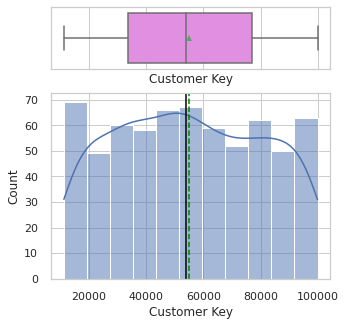

<Figure size 432x288 with 0 Axes>

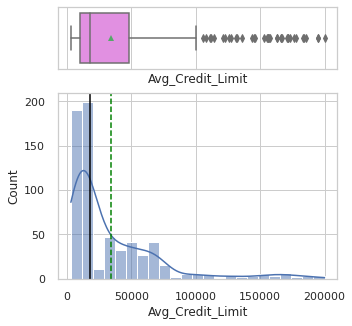

<Figure size 432x288 with 0 Axes>

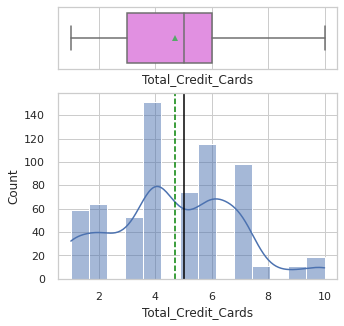

<Figure size 432x288 with 0 Axes>

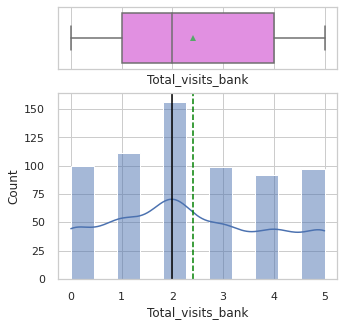

<Figure size 432x288 with 0 Axes>

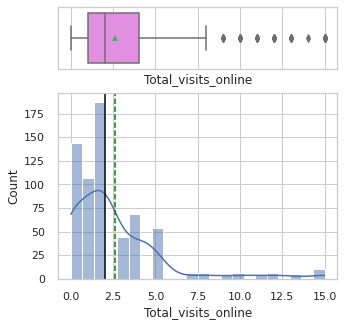

<Figure size 432x288 with 0 Axes>

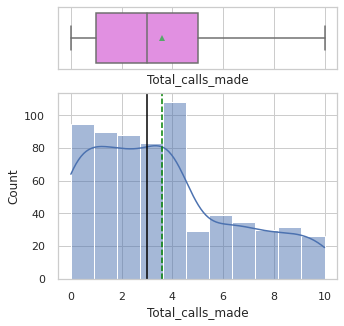

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# selecting numerical columns
num_col = dfx.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    fig = plt.figure()
    histogram_boxplot(dfx, item, figsize=(5, 5), kde=True)
    plt.show()

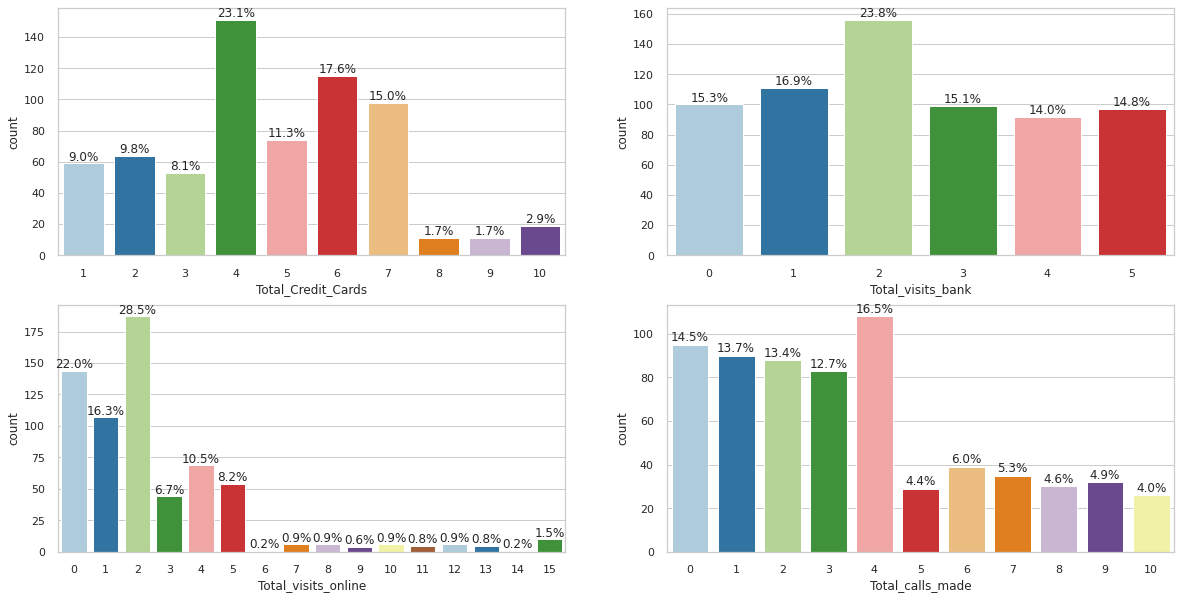

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig = plt.figure(figsize=(20, 10))
numcol = [
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made",
]
for i, col in enumerate(numcol):
    ax = fig.add_subplot(2, 2, i + 1)
    sns.countplot(
        data=dfx, x=col, palette="Paired", ax=ax,
    )
    for p in ax.patches:
        label = "{:.1f}%".format(100 * p.get_height() / len(dfx))
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height() + 1  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the p

### Observations:
 - There are outliers in Avg Credit Limit and Total Visits online but looks all valid we will keep it
 - in average 4 or less calls were made by customers
 - It looks like the higher number of credit card holders have higher Avg Credit Limit and make use of Online banking more , possibly to check expenditure ,increase the credit limit 
 - 66% Customer hold 4 or more Credit Cards 
 - 23% Customer visited bank personally twice in a year 15% made 5 visits 
 - 22% customer did not do any online activity, while 68% customers made between 1-5 online activity
 - Bank made 4 or less calls per customer in an year 
 - There are outliers in Avg_Credit_Limit and Total_visits_online but that do seems to be a valid data, as we find some relation with Total_Credit_Cards  We will keep Outliers 

### Bivariate Analysis

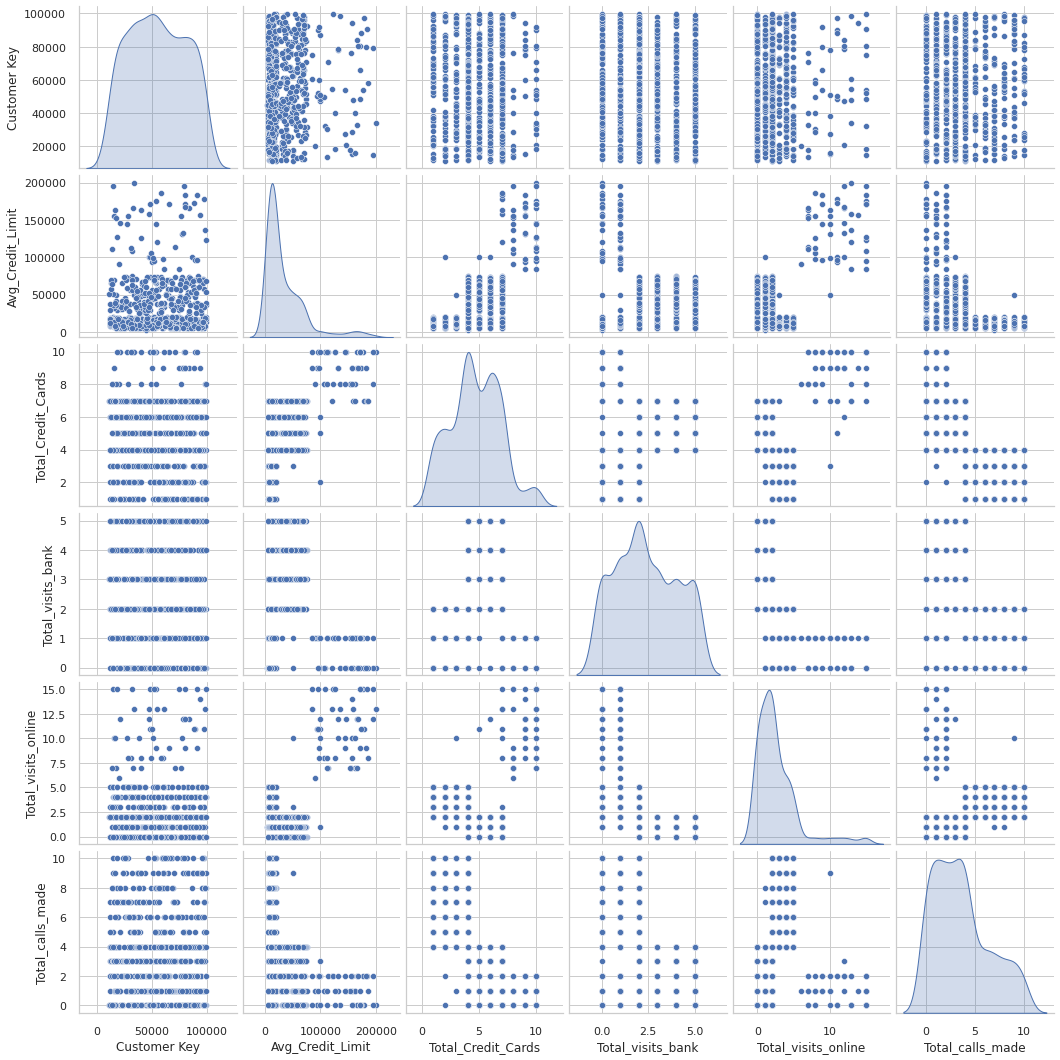

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.pairplot(dfx, diag_kind="kde")

### Observations:
- Total_visits_online and Avg_Credit_Limit Right skewed. More and More user should be encoraged to visit online for more business 
- Total_calls_made vs Total_visit_online show two major cluster , less online visitors made more support  calls. 
- Similar two cluster groups are seen with many features ( Intertesing to see how they will be clustred)

In [ ]:
dfx.corr()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,1.000000,0.057904,-0.013169,0.002569,0.018467,0.009295
Avg_Credit_Limit,0.057904,1.000000,0.611015,-0.097462,0.551740,-0.412691
Total_Credit_Cards,-0.013169,0.611015,1.000000,0.316306,0.168144,-0.649331
Total_visits_bank,0.002569,-0.097462,0.316306,1.000000,-0.552092,-0.508962
Total_visits_online,0.018467,0.551740,0.168144,-0.552092,1.000000,0.128981
Total_calls_made,0.009295,-0.412691,-0.649331,-0.508962,0.128981,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
found = 0
corcols = list(dfx.corr().columns)
for colsx in corcols:
    tempxs = [x for x in corcols if x != colsx]
    for temps in tempxs:
        corval = dfx[[colsx, temps]].corr()[colsx][1]
        if abs(corval) > 0.95:
            print(f"corelation value between {colsx} and {temps} is {corval:0.2f}")
            found += 1
if not found:
    print(f"no high correlation between features found")

no high correlation between features found


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

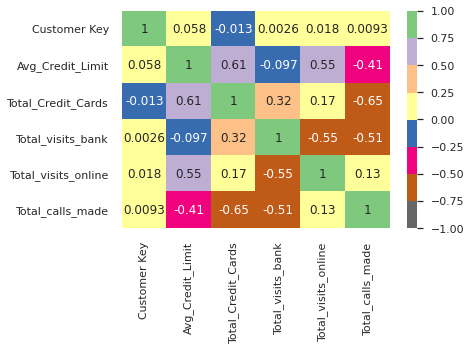

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.heatmap(dfx.corr(), vmin=-1, vmax=1, annot=True, cmap=cm.Accent_r)

### Observations:
- No specific High correlation found between two features 

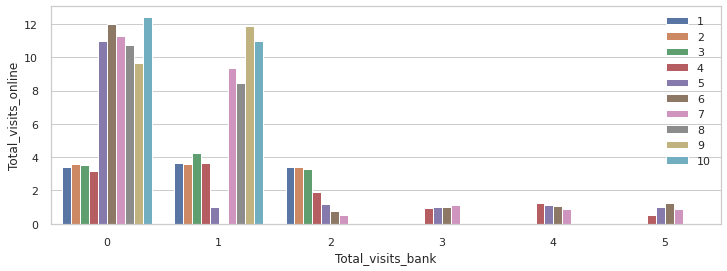

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# fig, ax = plt.subplots(111,figsize=(10, 10))
fig = plt.figure(figsize=(12, 4))
sns.barplot(
    data=dfx,
    x="Total_visits_bank",
    y="Total_visits_online",
    hue="Total_Credit_Cards",
    ci=None,
)
plt.legend(loc="upper right")
plt.show()

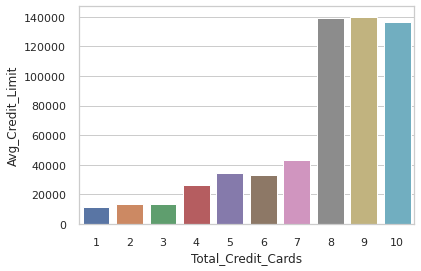

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# fig, ax = plt.subplots(111,figsize=(10, 10))
fig = plt.figure(figsize=(6, 4))
sns.barplot(data=dfx, x="Total_Credit_Cards", y="Avg_Credit_Limit", ci=None)

plt.show()

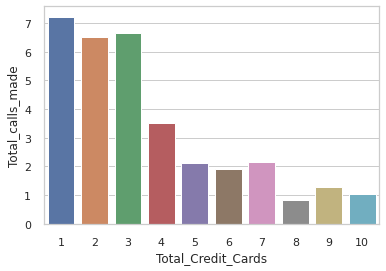

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig = plt.figure(figsize=(6, 4))
sns.barplot(data=dfx, x="Total_Credit_Cards", y="Total_calls_made", ci=None)

plt.show()

### Observations:
- customer with 8 or more credit cards used online banking more that others
- Customer with 8 or more Credit cards have higher credit limits
- More support calls were made by Customer with 4 or less credit cards

### Data Preprocessing 

In [ ]:
# No outlier treament needed
# we will not drop duplicate customer ids as that could be valid entries
# Drop Customer Key colums from clustering

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
custdata = df.drop("Customer Key", axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
custdata.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Due to mismatch in the feature we will scale it using standard scaling

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
subset_scaled_df = custdata.apply(st.zscore)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## KMeans Clustering

#### Deciding number of clusters

We don't know how many clusters need to build for correct grouping of data. There are multiple ways to decide the k value.

Elbow plot using inertia_ which is sum of the squared distance to centroid and see where the curve bends as that value of k is best choice for the clustering. Similar elbow curve can be plotted against distortion

#### validating the k value

There are mutliple ways to cross validate the cluster. Popular and most used one is Silhouette Coefficient 

*Silhouette Coefficient* : is a value between -1 to 1 where 1 indicates tight cluster and 0 indicates overlapping cluster 


Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9426543606899347
Number of Clusters: 7 	Average Distortion: 0.9093991915419353
Number of Clusters: 8 	Average Distortion: 0.8843243844476886
Number of Clusters: 9 	Average Distortion: 0.8650832420580971
Number of Clusters: 10 	Average Distortion: 0.8411372125672628
Number of Clusters: 11 	Average Distortion: 0.8231750888188953


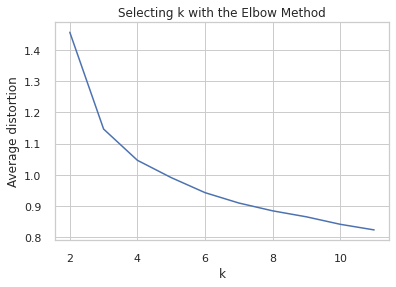

CPU times: user 5.15 s, sys: 490 ms, total: 5.64 s
Wall time: 2.57 s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%time
clusters = range(2, 12)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

Number of Clusters: 2 	Average Inertia: 2040.9898164784947
Number of Clusters: 3 	Average Inertia: 933.0437490000533
Number of Clusters: 4 	Average Inertia: 780.7736895551769
Number of Clusters: 5 	Average Inertia: 704.4759188657516
Number of Clusters: 6 	Average Inertia: 642.428545142321
Number of Clusters: 7 	Average Inertia: 600.2238778375963
Number of Clusters: 8 	Average Inertia: 574.4418958177623
Number of Clusters: 9 	Average Inertia: 538.8269188945013
Number of Clusters: 10 	Average Inertia: 509.16313788912555
Number of Clusters: 11 	Average Inertia: 491.206987252707


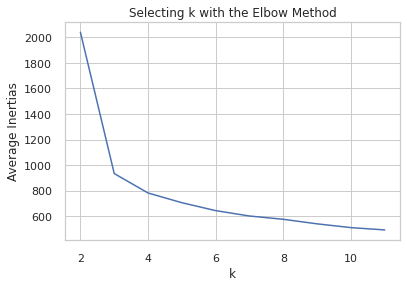

CPU times: user 4.66 s, sys: 346 ms, total: 5.01 s
Wall time: 2.2 s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%time
clusters = range(2, 12)
Inertias = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    Inertias.append(model.inertia_)
    print("Number of Clusters:", k, "\tAverage Inertia:", model.inertia_)

plt.plot(clusters, Inertias, "bx-")
plt.xlabel("k")
plt.ylabel("Average Inertias")
plt.title("Selecting k with the Elbow Method")
plt.show()

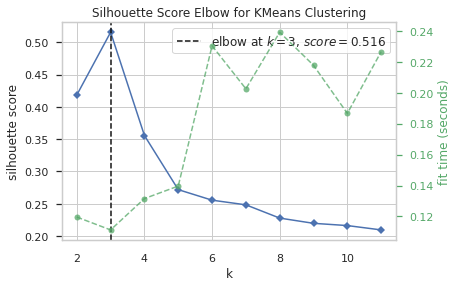

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
vz = KElbowVisualizer(model, k=range(2, 12), metric="silhouette")
vz.fit(subset_scaled_df)  # Fit the data to the visualizer
vz.show()

Silhouette Score for k 2 is 0.41842496663230405
Silhouette Score for k 3 is 0.5157182558882754
Silhouette Score for k 4 is 0.35566706193773706
Silhouette Score for k 5 is 0.2717470361094591
Silhouette Score for k 6 is 0.25590676529850875
Silhouette Score for k 7 is 0.2479864465613871
Silhouette Score for k 8 is 0.2414240144772954
Silhouette Score for k 9 is 0.2184645050766369
Silhouette Score for k 10 is 0.2140658673097117
Silhouette Score for k 11 is 0.20465464050907836
CPU times: user 5.75 s, sys: 423 ms, total: 6.17 s
Wall time: 2.62 s


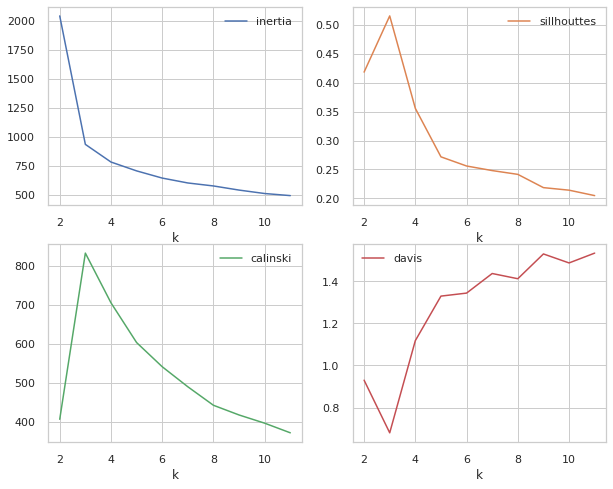

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%time
inertias = []
sils = []
chs = []
dbs = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=1, n_clusters=k)
    k2.fit(subset_scaled_df)
    inertias.append(k2.inertia_)
    sils.append(silhouette_score(subset_scaled_df, k2.labels_))
    chs.append(calinski_harabasz_score(subset_scaled_df, k2.labels_))
    dbs.append(davies_bouldin_score(subset_scaled_df, k2.labels_))
    print("Silhouette Score for k {0} is {1}".format(k, sils[k - 2]))
fig, ax = plt.subplots(figsize=(10, 8))
_ = (
    pd.DataFrame(
        {
            "inertia": inertias,
            "sillhouttes": sils,
            "calinski": chs,
            "davis": dbs,
            "k": sizes,
        },
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)

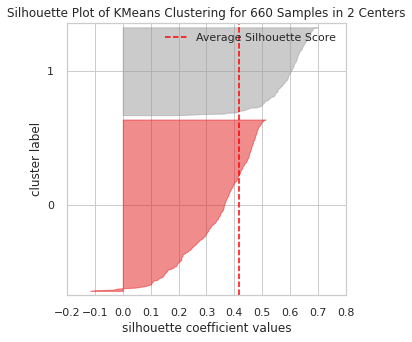

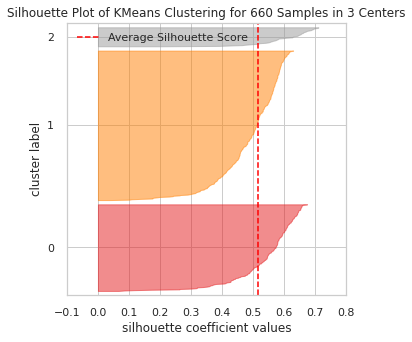

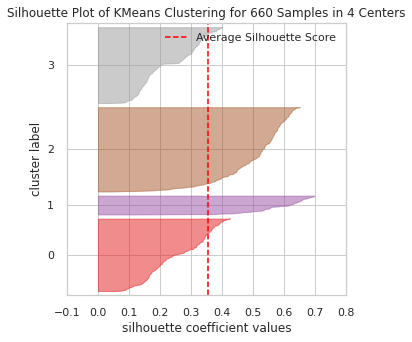

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# finding optimal no. of clusters with Silhouette Visualize
fig = plt.figure(figsize=(5, 5))
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()
plt.show()

fig = plt.figure(figsize=(5, 5))
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()
plt.show()

fig = plt.figure(figsize=(5, 5))
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()
plt.show()

### Observations:
 - For silhouette Visualizer we look for 
         * clear cluster seperation and higher average Sillhouette score line, each cluster group spread extend beyond the average line
         * for k = 3 we get clear cluster separation and average ~ 0.5
 - From all above metrics it looks like k=3 is the n_cluster value cluster can give better results   

### Run KMeans with n_clusters=3

In [ ]:
datacols = [
    "Avg_Credit_Limit",
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made",
]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%time
# let's take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

CPU times: user 133 ms, sys: 8.11 ms, total: 142 ms
Wall time: 57.3 ms


KMeans(n_clusters=3, random_state=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df["K_means_segments"] = kmeans.labels_
custdata["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Customer Profiling 

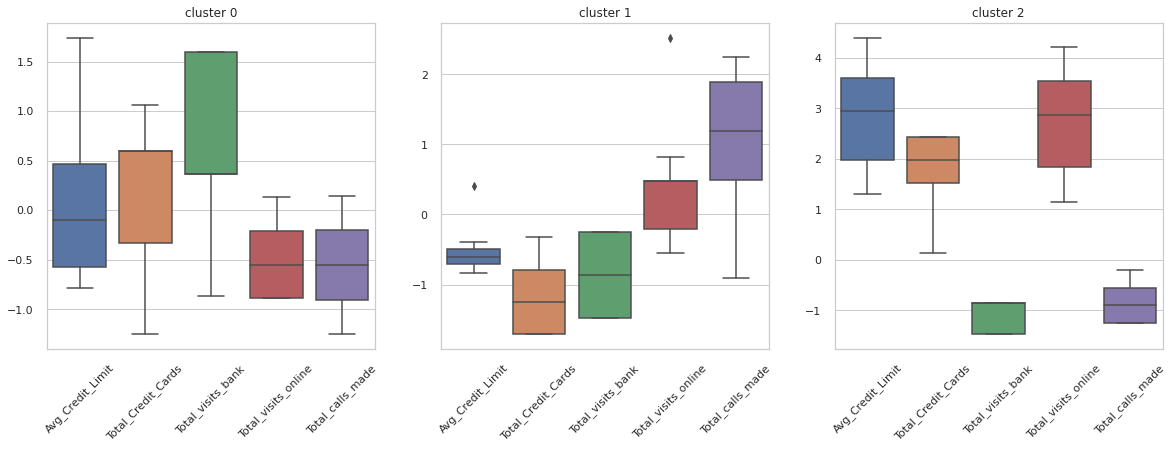

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig = plt.figure(figsize=(20, 6))
for i in subset_scaled_df["K_means_segments"].unique():
    ax = fig.add_subplot(1, 3, i + 1)
    sns.boxplot(
        data=subset_scaled_df.loc[subset_scaled_df["K_means_segments"] == i, datacols],
        ax=ax,
    )
    ax.set_title("cluster " + str(i))
    plt.xticks(rotation=45)

<AxesSubplot:>

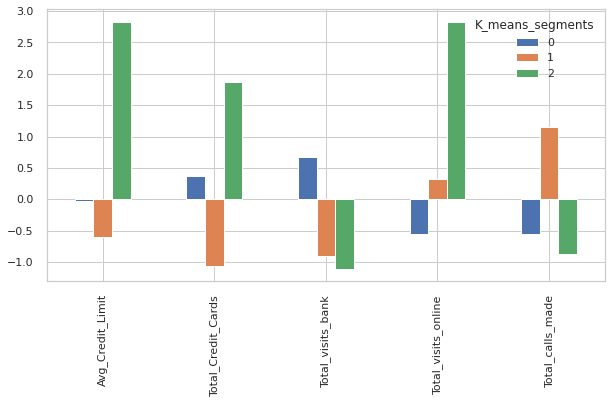

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
subset_scaled_df.groupby("K_means_segments").mean().T.plot.bar(ax=ax1)

### Observations:
- For group 0 Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank forms grouping features
- For group 1 Total_visits_online, Total_calls_made forms the grouping feature
- For group 2 Avg_Credit_Limit,Total_Credit_Cards,Total_visits_online forms the grouping feature

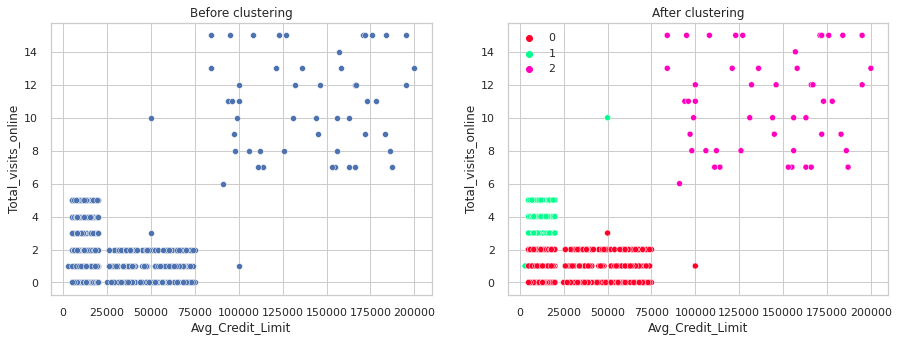

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(
    data=df,
    x="Avg_Credit_Limit",
    y="Total_visits_online",
    palette="gist_rainbow",
    ax=ax1,
)
sns.scatterplot(
    data=df,
    x="Avg_Credit_Limit",
    y="Total_visits_online",
    hue="K_means_segments",
    palette="gist_rainbow",
    ax=ax2,
)
ax1.set_title("Before clustering")
ax2.set_title("After clustering")
ax2.legend( loc="upper left")


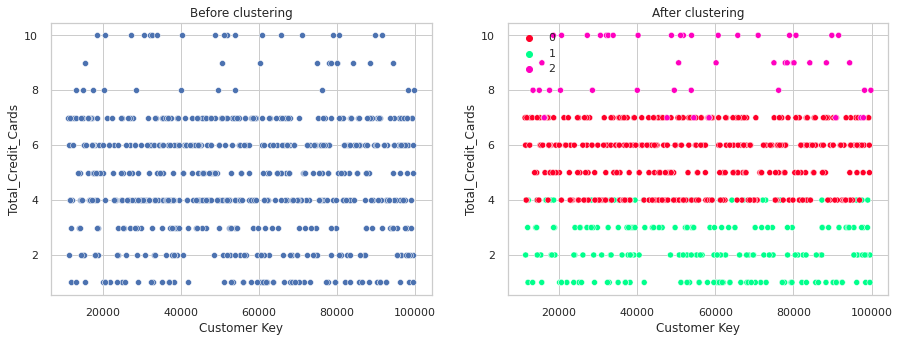

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(
    data=df, x="Customer Key", y="Total_Credit_Cards", palette="gist_rainbow", ax=ax1,
)
sns.scatterplot(
    data=df,
    x="Customer Key",
    y="Total_Credit_Cards",
    hue="K_means_segments",
    palette="gist_rainbow",
    ax=ax2,
)
ax1.set_title("Before clustering")
ax2.set_title("After clustering")
ax2.legend(loc="upper left")

In [ ]:
cluster_profile = custdata.groupby("K_means_segments").mean()
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# let's display cluster profiles
cluster_profile.style.background_gradient(cmap="nipy_spectral", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Observations:
- The customers are grouped 3 clusters 
- Customers with Higher credit limits, more credit card and use online facility forms one group with customer count of lowest of the 3 , these customers do tend to make less support calls 
- Customers with lower credit limit less credit card form second group which tend to use online service but have made more support calls 
- Customers in group 0 have credit limit and credit cards between the two groups, these customes rely more on bank visit than using online facility and have second in making customer calls. This group forms majority of customer base 

### Aggolomerative (Hirearchical) Clustering

In [ ]:
dfh = df.drop("K_means_segments", axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
hcustdata = custdata.drop("K_means_segments", axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
subset_scaled_hf = hcustdata.apply(st.zscore)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
subset_scaled_hf.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%time
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_hf, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_hf))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553604.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875358.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

CPU times: user 14.6 s, sys: 103 ms, total: 14.7 s
Wall time: 14.7 s


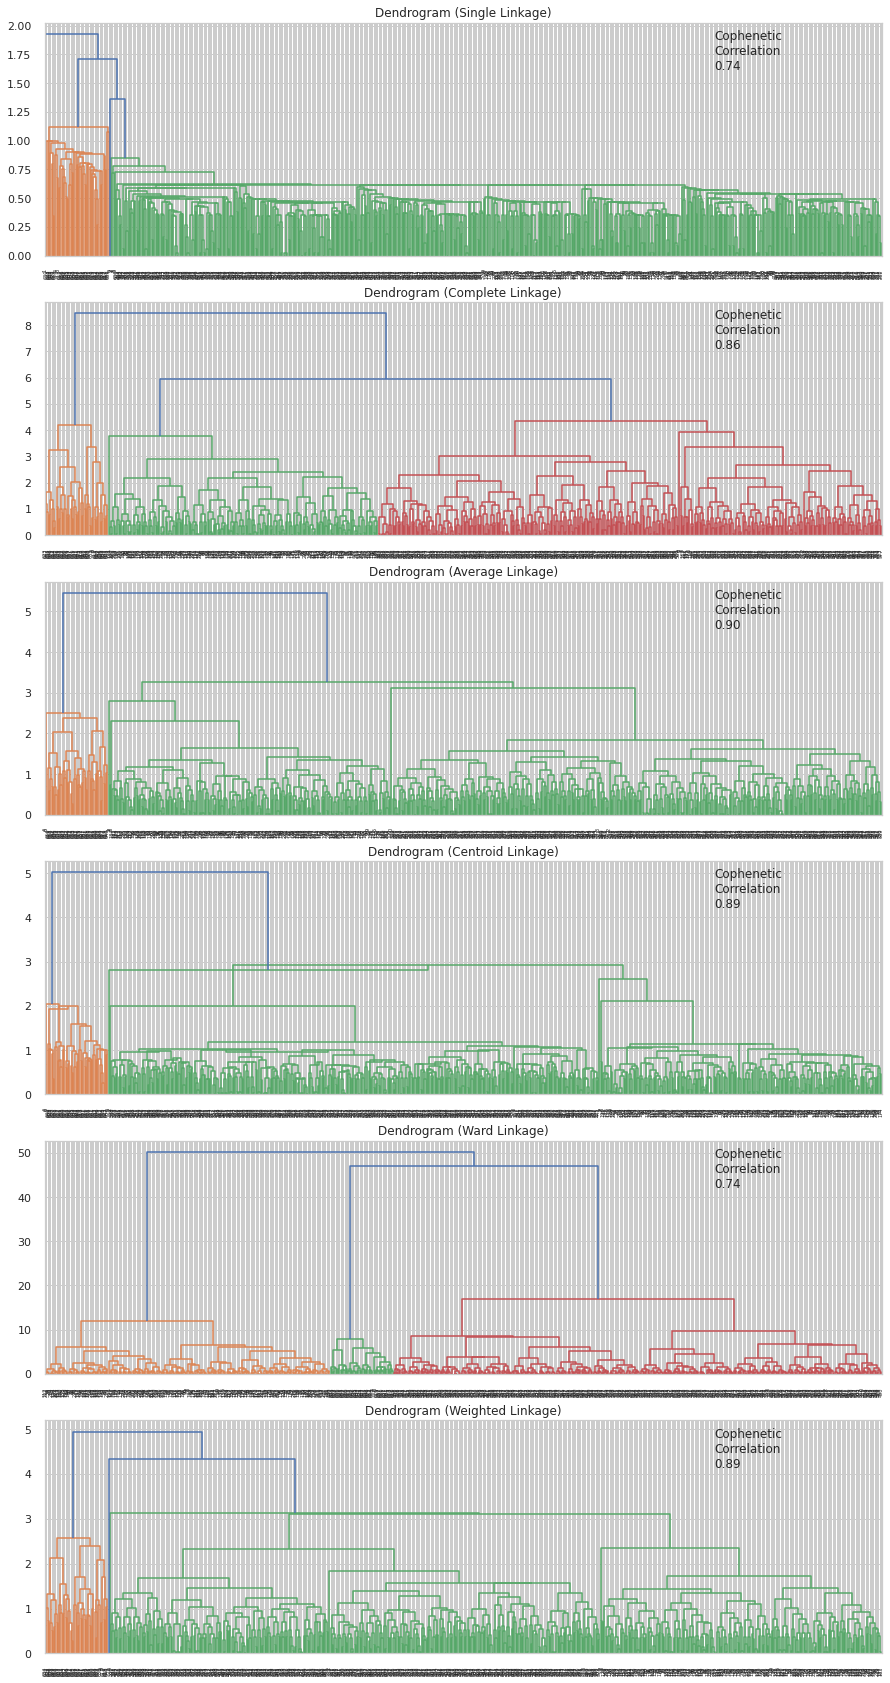

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%time
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_hf, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_hf))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
1,complete,0.859973
2,average,0.897708
3,centroid,0.893939
4,ward,0.741516
5,weighted,0.886175


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Observations:

- For dendograms we rely on which dendogram gives us clear cluster groups and have cophenetic score more that 0.50
- From dendograms *ward* linkage with *euclidean* distance looks better choice for cluster, as it gives separate and distinct clusters 
- From cophenetic distance *average* method give better score , we will evaluate it further 

#### We will check scores for linkage *ward* and *average*  with *euclidean* 

Silhouette Score for k 2 is 0.41770414762109936
Silhouette Score for k 3 is 0.5147639589979518
Silhouette Score for k 4 is 0.348082258126694
Silhouette Score for k 5 is 0.25691777326808435
Silhouette Score for k 6 is 0.2267784972566746
Silhouette Score for k 7 is 0.21629686854980873
Silhouette Score for k 8 is 0.21869490619485493
Silhouette Score for k 9 is 0.19527074669218447
Silhouette Score for k 10 is 0.19314189588784242
Silhouette Score for k 11 is 0.1745836348086105
CPU times: user 1.56 s, sys: 67.4 ms, total: 1.63 s
Wall time: 913 ms


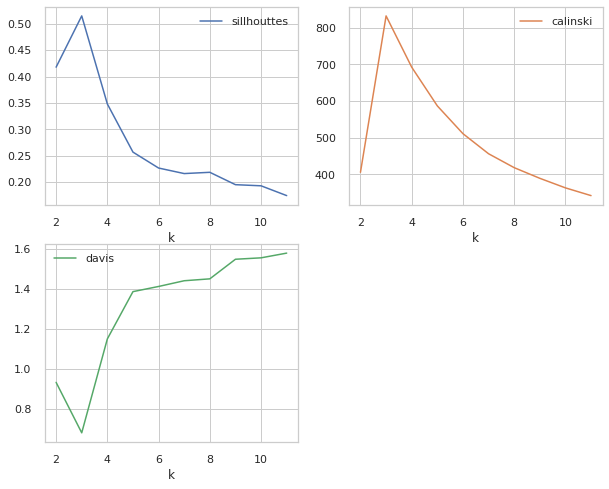

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%time
sils = []
chs = []
dbs = []
sizes = range(2, 12)
for k in sizes:
    hcluster = AgglomerativeClustering(
        n_clusters=k, affinity="euclidean", linkage="ward"
    )
    hcluster.fit(subset_scaled_hf)
    sils.append(silhouette_score(subset_scaled_hf, hcluster.labels_))
    chs.append(calinski_harabasz_score(subset_scaled_hf, hcluster.labels_))
    dbs.append(davies_bouldin_score(subset_scaled_hf, hcluster.labels_))
    print("Silhouette Score for k {0} is {1}".format(k, sils[k - 2]))
fig, ax = plt.subplots(figsize=(10, 8))
_ = (
    pd.DataFrame({"sillhouttes": sils, "calinski": chs, "davis": dbs, "k": sizes,},)
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)

Silhouette Score for k 2 is 0.5703183487341072
Silhouette Score for k 3 is 0.5159224326511334
Silhouette Score for k 4 is 0.4749514359581223
Silhouette Score for k 5 is 0.4403975302480271
Silhouette Score for k 6 is 0.4153547954833329
Silhouette Score for k 7 is 0.41837756746739024
Silhouette Score for k 8 is 0.34306710358300163
Silhouette Score for k 9 is 0.34154869328928283
Silhouette Score for k 10 is 0.3455094712140732
Silhouette Score for k 11 is 0.24472912181729636
CPU times: user 1.52 s, sys: 63.4 ms, total: 1.58 s
Wall time: 873 ms


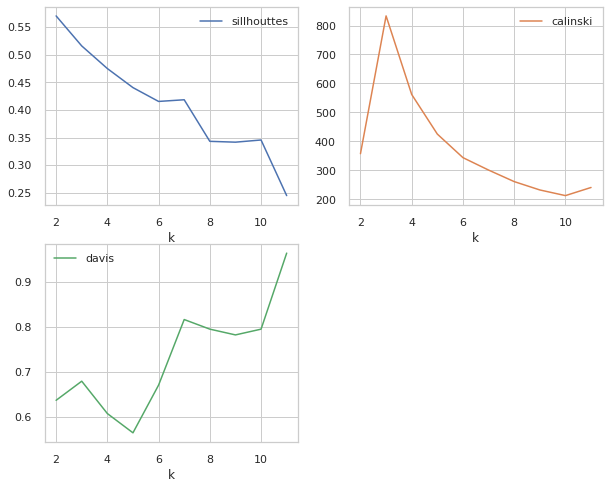

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%time
sils = []
chs = []
dbs = []
sizes = range(2, 12)
for k in sizes:
    hcluster = AgglomerativeClustering(
        n_clusters=k, affinity="euclidean", linkage="average"
    )
    hcluster.fit(subset_scaled_hf)
    sils.append(silhouette_score(subset_scaled_hf, hcluster.labels_))
    chs.append(calinski_harabasz_score(subset_scaled_hf, hcluster.labels_))
    dbs.append(davies_bouldin_score(subset_scaled_hf, hcluster.labels_))
    print("Silhouette Score for k {0} is {1}".format(k, sils[k - 2]))
fig, ax = plt.subplots(figsize=(10, 8))
_ = (
    pd.DataFrame({"sillhouttes": sils, "calinski": chs, "davis": dbs, "k": sizes,},)
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)


### Observations:
 - for good cluster 
       * Sillhouette score must be between -1 to 1 but higher is better
       * calinski score is 0 and up but higher is better
       * davis score is 0 and up but lower is better
 
 - with *ward* linkage we get match for all 3 score at k = 3
 - with *Average* we get random results for all 3 scores 
 
 
 *For Agglomerative Clustering we will go with k = 3*

### Modeling 

In [ ]:
%%time
hcluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
hcluster.fit(subset_scaled_hf)

CPU times: user 28.8 ms, sys: 383 µs, total: 29.2 ms
Wall time: 27.1 ms


AgglomerativeClustering(n_clusters=3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfh["hcluster_segments"] = hcluster.labels_
hcustdata["hcluster_segments"] = hcluster.labels_
subset_scaled_hf["hcluster_segments"] = hcluster.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
subset_scaled_hf.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,hcluster_segments
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Customer Profiling 

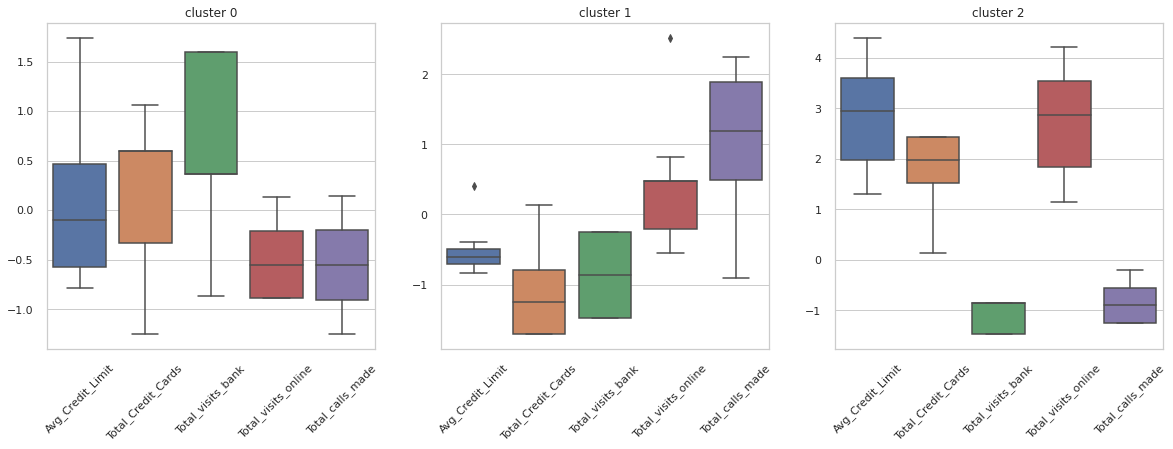

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig = plt.figure(figsize=(20, 6))
for i in subset_scaled_hf["hcluster_segments"].unique():
    ax = fig.add_subplot(1, 3, i + 1)
    sns.boxplot(
        data=subset_scaled_df.loc[subset_scaled_hf["hcluster_segments"] == i, datacols],
        ax=ax,
    )
    ax.set_title("cluster " + str(i))
    plt.xticks(rotation=45)

<AxesSubplot:>

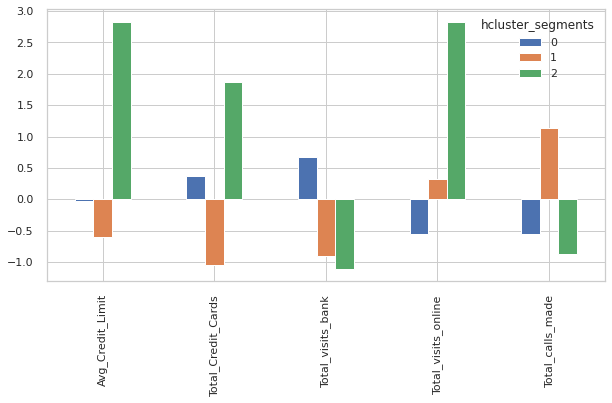

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
subset_scaled_hf.groupby("hcluster_segments").mean().T.plot.bar(ax=ax1)

### Observations:
- For group 0 Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank forms grouping features 
- For group 1 Total_visits_online, Total_calls_made forms the grouping feature 
- For group 2 Avg_Credit_Limit,Total_Credit_Cards,Total_visits_online forms the grouping feature 

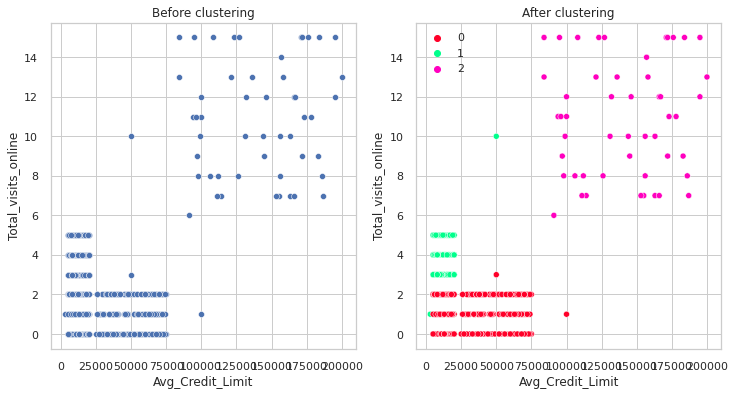

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(
    data=dfh,
    x="Avg_Credit_Limit",
    y="Total_visits_online",
    palette="gist_rainbow",
    ax=ax1,
)
sns.scatterplot(
    data=dfh,
    x="Avg_Credit_Limit",
    y="Total_visits_online",
    hue="hcluster_segments",
    palette="gist_rainbow",
    ax=ax2,
)
ax1.set_title("Before clustering")
ax2.set_title("After clustering")
ax2.legend( loc="upper left")


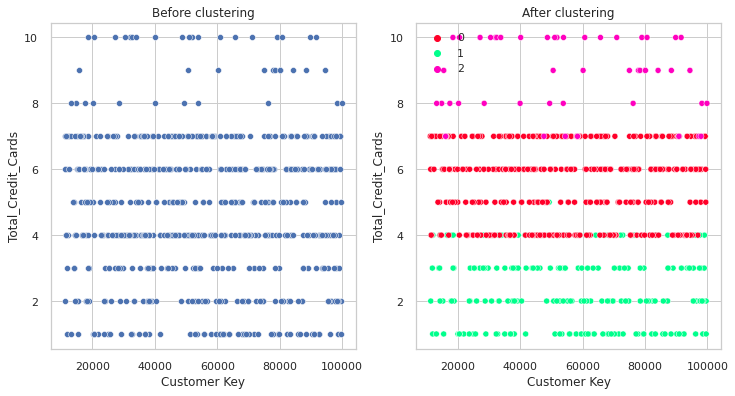

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(
    data=dfh, x="Customer Key", y="Total_Credit_Cards", palette="gist_rainbow", ax=ax1,
)
sns.scatterplot(
    data=dfh,
    x="Customer Key",
    y="Total_Credit_Cards",
    hue="hcluster_segments",
    palette="gist_rainbow",
    ax=ax2,
)
ax1.set_title("Before clustering")
ax2.set_title("After clustering")
ax2.legend(loc="upper left")

In [ ]:
cluster_profile_h = hcustdata.groupby("hcluster_segments").mean()
cluster_profile_h["count_in_each_segments"] = (
    dfh.groupby("hcluster_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# let's display cluster profiles
cluster_profile_h.style.background_gradient(cmap="nipy_spectral", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
hcluster_segments,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cluster_profile_h.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
hcluster_segments,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Observations:
- The customers are grouped 3 clusters 
- Customers with Higher credit limits, more credit card and use online facility forms one group with customer count of lowest of the 3 , these customers do tend to make less support calls 
- Customers with lower credit limit less credit card form second group which tend to use online service but have made more support calls 
- Customers in group 0 have credit limit and credit cards between the two groups, these customes rely more on bank visit than using online facility and have second in making customer calls. This group forms majority of customer base 

### Compare the cluster profile of both the methods

In [ ]:
print("\t\tCluster profile for Agglomerative Clustering")
cluster_profile_h.style.highlight_max(color="lightgreen", axis=0)

		Cluster profile for Agglomerative Clustering


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
hcluster_segments,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("\t\tCluster profile for KMeans Clustering")
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

		Cluster profile for KMeans Clustering


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Observations
- Both clustering models gives similar results 
- There are no major deviations found between models
- Clustering criteria remains same across both the models
- Sillhoutte score is also same across both the models 
- There is no specific differecing criteria that can be applied to select perticular algorithm over the other but in general KMeans is may work efficintly with large dataset.
- Experiment with Larger dataset needed before selection of model can be made 

### Actionable Insights & Recommendations

- It looks like customer in group 2 use more online facility and tend to make less number of customer support calls , May be these customer are from higher income , higher online banking awareness class have mastered online banking  

- Customer in group 1 with lower credit Limits and lower credit cards , thise group tend to use online facility but have more customer support calls. This can be a possible indications of non user friendly online service, or opportunity to improve online service.

- Group 0 customers make more visit to bank and have lower online presence, they also have moderate number of customer support calls. Bank need to investigate reasons why these customer do not use online service and address the concerns if they related to techonology. These will help reduce the workload of banking staff.

- Group 0 customers have moderate number of credit cards with good credit limits and should be encouraged to use them with additional returns.  

- Bank need to focus on group 1 to address their concerns as this group try to use online service but not able to make their way. Addressing these set of customer can help increate more credit card usage and business opportunity 

- Bank need to review its online service, talking to the customers and support team to identify the issues in online service and fix it 

- Reviwing online banking service will help increase the business and also reduce the # complaints about customer support 